In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
tf.random.set_seed(7)

In [20]:
etf_Data= pd.read_csv('/content/sample_data/etf_data.csv')

df = etf_Data[[ 'DIA', 'EEM', 'QQQ', 'SPY', 'VXX' ]]
descdf = df.describe()
descdf

,DIA,EEM,QQQ,SPY,VXX
count,58258.000000,58258.000000,58258.000000,58258.000000,58258.000000
mean,269.776353,42.067465,193.148619,299.802244,22.697420
std,8.046851,1.441455,8.737832,10.387751,4.250747
min,247.140000,38.720000,169.380000,273.230000,14.790000
25%,263.880000,41.060000,187.340000,292.390000,18.936850
50%,269.500000,42.320000,191.920000,298.630000,23.215000
75%,274.837500,42.990000,200.230000,307.590000,26.285000
max,286.840000,45.170000,214.530000,323.640000,31.360000


In [4]:
normalized_df=(df-df.mean())/df.std()
display(normalized_df)
df = normalized_df

,DIA,EEM,QQQ,SPY,VXX
0,-2.535943,-1.163730,-2.097616,-2.257683,1.875572
1,-2.557069,-1.170667,-2.117072,-2.278861,1.877924
2,-2.542156,-1.156793,-2.120505,-2.275011,1.870796
3,-2.558312,-1.177605,-2.128516,-2.293609,1.870867
4,-2.584409,-1.177605,-2.142250,-2.312555,1.899097
...,...,...,...,...,...
58253,1.898090,1.965052,2.238700,2.129696,-1.783785
58254,1.895604,1.944240,2.220388,2.114775,-1.773199
58255,1.890634,1.944240,2.216955,2.108999,-1.764965
58256,1.880692,1.965052,2.222677,2.108518,-1.768494


In [5]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df[:train_size], df[train_size:]
print(train.shape)
print(test.shape)

(40780, 5)
(17478, 5)


In [ ]:
# def create_dataset(dataset, look_back=1):
#   print(len(dataset))
#   dataX, dataY = [], []
#   for i in range(len(dataset)-look_back-1):
#     a = dataset.iloc[i:(i+look_back)]
#     dataX.append(a)
#     dataY.append(dataset.iloc[i+look_back, -1])
#   return np.array(dataX), np.array(dataY)

In [ ]:
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

148
64


In [6]:
trainX = train.iloc[:]
testX = test.iloc[:]

In [7]:
print(trainX.shape)
print(testX.shape)

(40780, 5)
(17478, 5)


In [ ]:
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# trainX = np.expand_dims(trainX, axis=1)
# testX = np.expand_dims(testX, axis=1)
# print(trainX.shape)
# print(testX.shape)

In [8]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence.iloc[i:end_ix], sequence.iloc[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# n_steps = 3
# tX, tY = split_sequence(trainX.iloc[:,0], n_steps)


In [9]:
n_steps = 3
models = []
for feature in range(5):
  tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
  tX = np.expand_dims(tX, axis=1)
  model = Sequential()
  model.add(LSTM(1, input_shape=(1,n_steps)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  model.fit(tX, tY, epochs=1, batch_size=1, verbose=1)
  models.append(model)

40777/40777 [==============================] - 109s 3ms/step - loss: 0.0205


In [ ]:
# for feature, model in enumerate(models):
#   print('checkpoint ' + str(feature))
#   tesX, tesY = split_sequence(testX.iloc[:,feature], n_steps)

In [11]:
# feature = 0
# tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
# tesX, tesY = split_sequence(testX.iloc[:,feature], n_steps)

# tX = np.expand_dims(tX, axis=1)
# tesX = np.expand_dims(tesX, axis=1)

# trainPredict = models[feature].predict(tX)
# testPredict = models[feature].predict(tesX)

547/547 [==============================] - 1s 2ms/step


In [21]:
train_predictions = []
test_predictions = []
for feature in range(5):
  tX, tY = split_sequence(trainX.iloc[:,feature], n_steps)
  tesX, tesY = split_sequence(testX.iloc[:,feature], n_steps)
  tX = np.expand_dims(tX, axis=1)
  tesX = np.expand_dims(tesX, axis=1)
  trainPredict = models[feature].predict(tX)
  testPredict = models[feature].predict(tesX)
  
  train_predictions.append(trainPredict)
  test_predictions.append(testPredict)

547/547 [==============================] - 1s 2ms/step


In [ ]:
# def data_integration(data):
#     data = data.cumsum()
#     return data

In [ ]:
# def data_differencing(data):
#     pd.DataFrame(
#     seed_row = data.iloc[0:1, :]
#     diff_data = data.diff().dropna()
#     diff_data = pd.concat([seed_row, diff_data])
#     return diff_data

In [ ]:
# trainPredict = data_integration(trainPredict)
# trainY = data_integration(trainY)
# testPredict = data_integration(testPredict)
# testY = data_integration(testY)

# trainPredict = data_differencing(trainPredict)
# testPredict = data_differencing(testPredict)

In [ ]:
print(trainPredict.shape)

(40770, 1)


In [14]:
from sklearn.metrics import mean_squared_error

trainScore = np.sqrt(mean_squared_error(tY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(tesY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.41 RMSE


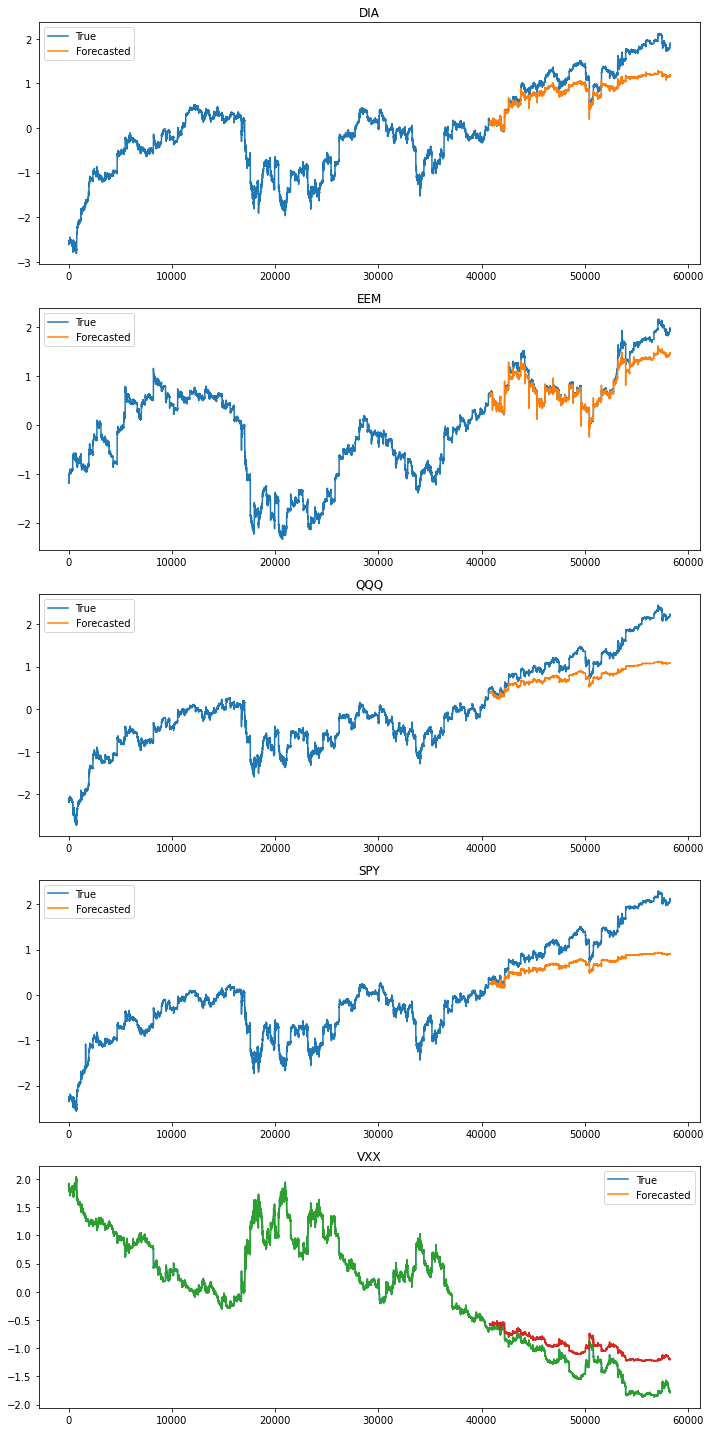

In [22]:
n_plots = etf_Data.shape[1]-1

fig, axs = plt.subplots(n_plots, 1, figsize=(10, 20))

for i, column in enumerate(etf_Data.columns):
    ax = axs[i-1]
    # preds_final = train_predictions[i-1]
    # preds_final = np.append(preds_final, test_predictions[i-1])
    preds_final_x = range(40780,58255)
    preds_final = test_predictions[i-1]

    ax.plot(np.append(trainX.iloc[:, i-1], testX.iloc[:, i-1]))
    ax.plot(preds_final_x, preds_final)
    ax.legend(['True', 'Forecasted'])
    ax.set_title(column)
    
plt.tight_layout()

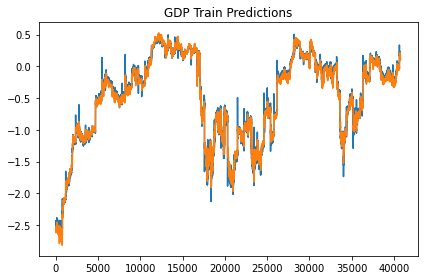

In [15]:
trainPredictPlot = trainPredict
plt.plot(trainPredictPlot)
plt.plot(tY)
plt.title('GDP Train Predictions')
plt.tight_layout()
plt.show()

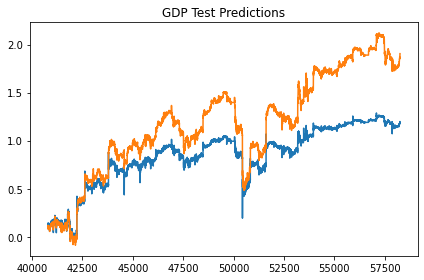

In [19]:
testPredictPlot = testPredict
plt.plot(range(40780,58255), testPredictPlot)
plt.plot(range(40780,58255), tesY)
plt.title('GDP Test Predictions')
plt.tight_layout()
plt.show()